In [1]:
import requests, json
from pprint import pprint
import pandas as pd

In [2]:
from tqdm.auto import tqdm
tqdm.pandas()

C:\Users\aksha\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
# base url for all FPL API endpoints
base_url = 'https://fantasy.premierleague.com/api/'

# get data from bootstrap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()

# show the top level fields
pprint(r, indent=2, depth=1, compact=True)

{ 'element_stats': [...],
  'element_types': [...],
  'elements': [...],
  'events': [...],
  'game_settings': {...},
  'phases': [...],
  'teams': [...],
  'total_players': 8284535}


In [4]:
r['element_types']

[{'id': 1,
  'plural_name': 'Goalkeepers',
  'plural_name_short': 'GKP',
  'singular_name': 'Goalkeeper',
  'singular_name_short': 'GKP',
  'squad_select': 2,
  'squad_min_play': 1,
  'squad_max_play': 1,
  'ui_shirt_specific': True,
  'sub_positions_locked': [12],
  'element_count': 68},
 {'id': 2,
  'plural_name': 'Defenders',
  'plural_name_short': 'DEF',
  'singular_name': 'Defender',
  'singular_name_short': 'DEF',
  'squad_select': 5,
  'squad_min_play': 3,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 208},
 {'id': 3,
  'plural_name': 'Midfielders',
  'plural_name_short': 'MID',
  'singular_name': 'Midfielder',
  'singular_name_short': 'MID',
  'squad_select': 5,
  'squad_min_play': 2,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 250},
 {'id': 4,
  'plural_name': 'Forwards',
  'plural_name_short': 'FWD',
  'singular_name': 'Forward',
  'singular_name_short': 'FWD',
  

In [5]:
# get player data from 'elements' field
players = r['elements']

# show data for first player
pprint(players[0])

{'assists': 0,
 'bonus': 0,
 'bps': 48,
 'chance_of_playing_next_round': None,
 'chance_of_playing_this_round': None,
 'clean_sheets': 0,
 'code': 80201,
 'corners_and_indirect_freekicks_order': None,
 'corners_and_indirect_freekicks_text': '',
 'cost_change_event': 0,
 'cost_change_event_fall': 0,
 'cost_change_start': -2,
 'cost_change_start_fall': 2,
 'creativity': '0.0',
 'creativity_rank': 541,
 'creativity_rank_type': 55,
 'direct_freekicks_order': None,
 'direct_freekicks_text': '',
 'dreamteam_count': 0,
 'element_type': 1,
 'ep_next': '0.5',
 'ep_this': '0.5',
 'event_points': 0,
 'first_name': 'Bernd',
 'form': '0.0',
 'goals_conceded': 9,
 'goals_scored': 0,
 'ict_index': '7.9',
 'ict_index_rank': 270,
 'ict_index_rank_type': 19,
 'id': 1,
 'in_dreamteam': False,
 'influence': '79.0',
 'influence_rank': 146,
 'influence_rank_type': 19,
 'minutes': 270,
 'news': '',
 'news_added': None,
 'now_cost': 48,
 'own_goals': 0,
 'penalties_missed': 0,
 'penalties_order': None,
 'pena

In [6]:
# To view all columns
pd.set_option('display.max_columns', None)

In [7]:
# Creating players Data Frame
players = pd.json_normalize(r['elements'])


In [8]:
players.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [9]:
players[['id','web_name','team','element_type']].head()

,id,web_name,team,element_type
0,1,Leno,1,1
1,2,Rúnarsson,1,1
2,3,Willian,1,3
3,4,Aubameyang,1,4
4,5,Cédric,1,2


In [10]:
# create teams dataframe
teams = pd.json_normalize(r['teams'])

teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1190,1220,1110,1140,1100,1170,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1130,1180,1130,1140,1130,1160,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,3,None,False,0,1080,1100,1090,1130,1100,1150,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,3,None,False,0,1140,1180,1140,1180,1090,1130,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,2,None,False,0,1050,1060,1050,1070,1060,1100,43


In [11]:
# get position information from 'element_types' field
positions = pd.json_normalize(r['element_types'])
positions.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],68
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],208
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],250
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],85


In [12]:
# join players to teams
df = pd.merge(
    left=players,
    right=teams,
    left_on='team',
    right_on='id'
)

# show joined result
df[['first_name', 'second_name', 'name']].head()

,first_name,second_name,name
0,Bernd,Leno,Arsenal
1,Rúnar Alex,Rúnarsson,Arsenal
2,Willian,Borges Da Silva,Arsenal
3,Pierre-Emerick,Aubameyang,Arsenal
4,Cédric,Soares,Arsenal


In [13]:
# join player positions
df = df.merge(
    positions,
    left_on='element_type',
    right_on='id'
)

# rename columns
df = df.rename(
    columns={'name':'Team', 'singular_name':'Position'}
)

# show result
df[
    ['first_name', 'second_name', 'Team', 'Position']
].head()

,first_name,second_name,Team,Position
0,Bernd,Leno,Arsenal,Goalkeeper
1,Rúnar Alex,Rúnarsson,Arsenal,Goalkeeper
2,Karl,Hein,Arsenal,Goalkeeper
3,Aaron,Ramsdale,Arsenal,Goalkeeper
4,Arthur,Okonkwo,Arsenal,Goalkeeper


In [14]:
# get data from 'element-summary/{PID}/' endpoint for PID=4
r = requests.get(base_url + 'element-summary/4/').json()

# show top-level fields for player summary
pprint(r, depth=1)

{'fixtures': [...], 'history': [...], 'history_past': [...]}


In [15]:
# Show first gameweek data
pprint(r['history'][0])

{'assists': 0,
 'bonus': 0,
 'bps': 0,
 'clean_sheets': 0,
 'creativity': '0.0',
 'element': 4,
 'fixture': 1,
 'goals_conceded': 0,
 'goals_scored': 0,
 'ict_index': '0.0',
 'influence': '0.0',
 'kickoff_time': '2021-08-13T19:00:00Z',
 'minutes': 0,
 'opponent_team': 3,
 'own_goals': 0,
 'penalties_missed': 0,
 'penalties_saved': 0,
 'red_cards': 0,
 'round': 1,
 'saves': 0,
 'selected': 200068,
 'team_a_score': 0,
 'team_h_score': 2,
 'threat': '0.0',
 'total_points': 0,
 'transfers_balance': 0,
 'transfers_in': 0,
 'transfers_out': 0,
 'value': 100,
 'was_home': False,
 'yellow_cards': 0}


In [16]:
def get_gameweek_history(player_id):
    '''get all gameweek info for a given player_id'''
    
    # send GET request to
    # https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(
            base_url + 'element-summary/' + str(player_id) + '/'
    ).json()
    
    # extract 'history' data from response into dataframe
    df = pd.json_normalize(r['history'])
    
    return df

In [17]:
get_gameweek_history(1)[ [
        'round',
        'total_points',
        'minutes',
        'goals_scored',
        'assists'
    ]
].head()

,round,total_points,minutes,goals_scored,assists
0,1,1,90,0,0
1,2,2,90,0,0
2,3,1,90,0,0
3,4,0,0,0,0
4,5,0,0,0,0


In [18]:
def get_season_history(player_id):
    '''get all past season info for a given player_id'''
    
    # send GET request to
    # https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(
            base_url + 'element-summary/' + str(player_id) + '/'
    ).json()
    
    # extract 'history_past' data from response into dataframe
    df = pd.json_normalize(r['history_past'])
    
    return df


# show player #1's gameweek history
get_season_history(112)[
    [
        'season_name',
        'total_points',
        'minutes',
        'goals_scored',
        'assists'
    ]
].head(10)

,season_name,total_points,minutes,goals_scored,assists
0,2016/17,0,0,0,0
1,2017/18,152,3114,0,0
2,2018/19,0,0,0,0
3,2019/20,170,3420,0,0
4,2020/21,144,2880,0,0


In [19]:
# select columns of interest from players df
players = players[
    ['id', 'first_name', 'second_name', 'web_name', 'team',
     'element_type']
]

# join team name
players = players.merge(
    teams[['id', 'name']],
    left_on='team',
    right_on='id',
    suffixes=['_player', None]
).drop(['team', 'id'], axis=1)

# join player positions
players = players.merge(
    positions[['id', 'singular_name_short']],
    left_on='element_type',
    right_on='id'
).drop(['element_type', 'id'], axis=1)

players.head()

,id_player,first_name,second_name,web_name,name,singular_name_short
0,1,Bernd,Leno,Leno,Arsenal,GKP
1,2,Rúnar Alex,Rúnarsson,Rúnarsson,Arsenal,GKP
2,532,Karl,Hein,Hein,Arsenal,GKP
3,559,Aaron,Ramsdale,Ramsdale,Arsenal,GKP
4,572,Arthur,Okonkwo,Okonkwo,Arsenal,GKP


In [20]:
# get gameweek histories for each player
points = players['id_player'].progress_apply(get_gameweek_history)

# combine results into single dataframe
points = pd.concat(df for df in points)

# join web_name
points = players[['id_player', 'web_name']].merge(
    points,
    left_on='id_player',
    right_on='element'
)

In [21]:
points.drop('kickoff_time', inplace=True, axis=1)

In [22]:
# get top scoring players
points.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum'}
).sort_values(
    'total_points', ascending=False
).reset_index(
).head(15)

,element,web_name,total_points,goals_scored,assists
0,233,Salah,57,5,3
1,413,Antonio,47,5,4
2,256,Cancelo,44,0,2
3,419,Benrahma,42,3,2
4,205,Vardy,40,5,1
5,262,Dias,39,0,1
6,399,Sarr,39,4,0
7,122,Alonso,39,1,1
8,173,Doucouré,38,2,3
9,91,Pinnock,36,1,1


In [23]:
points.head()

,id_player,web_name,element,fixture,opponent_team,total_points,was_home,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,1,Leno,1,1,3,1,False,2,0,1,90,0,0,0,2,0,0,0,0,0,1,0,11,11.8,0.0,0.0,1.2,50,0,153122,0,0
1,1,Leno,1,18,6,2,True,0,2,2,90,0,0,0,2,0,0,0,0,0,3,0,17,24.2,0.0,0.0,2.4,50,-25816,144885,2627,28443
2,1,Leno,1,24,12,1,False,5,0,3,90,0,0,0,5,0,0,0,0,0,5,0,20,43.0,0.0,0.0,4.3,49,-14559,136757,5164,19723
3,1,Leno,1,31,15,0,True,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,49,6564,153130,35360,28796
4,1,Leno,1,43,5,0,False,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,49,-23847,129851,4822,28669


In [24]:
pl_list.reset_index()

NameError: name 'pl_list' is not defined

In [25]:
points[['influence', 'creativity', 'threat' , 'ict_index','bonus']]

,influence,creativity,threat,ict_index,bonus
0,11.8,0.0,0.0,1.2,0
1,24.2,0.0,0.0,2.4,0
2,43.0,0.0,0.0,4.3,0
3,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...
3508,0.0,0.0,0.0,0.0,0
3509,0.0,0.0,0.0,0.0,0
3510,0.0,0.0,0.0,0.0,0
3511,0.0,0.0,0.0,0.0,0


In [26]:
points= points.astype({"influence": float, "creativity": float, "threat" : float, "ict_index" : float})

In [27]:
pl_list = points.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum', 'minutes': 'mean', 'clean_sheets': 'sum', 'yellow_cards': 'mean',
    'influence' : 'mean', 'creativity': 'mean', 'threat': 'mean', 'ict_index': 'mean', 'bonus' : 'mean'}
)

In [28]:
pl_list.reset_index(inplace= True)

In [29]:
indexNames = pl_list[ pl_list['minutes'] == 0.0 ].index

In [30]:
pl_list.drop(indexNames, inplace = True)

In [31]:
pl_list.reset_index()

,index,element,web_name,total_points,goals_scored,assists,minutes,clean_sheets,yellow_cards,influence,creativity,threat,ict_index,bonus
0,0,1,Leno,4,0,0,45.000000,0,0.000000,13.166667,0.000000,0.000000,1.316667,0.000000
1,3,4,Aubameyang,20,2,0,59.500000,2,0.000000,14.466667,10.983333,35.833333,6.116667,0.666667
2,4,5,Cédric,1,0,0,31.333333,0,0.166667,5.133333,6.016667,0.166667,1.133333,0.000000
3,5,6,Lacazette,1,0,0,5.166667,0,0.000000,0.166667,0.050000,0.000000,0.016667,0.000000
4,6,7,Xhaka,4,0,0,49.166667,0,0.000000,7.033333,8.866667,1.500000,1.733333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,589,590,Tomiyasu,14,0,0,80.333333,2,0.000000,12.333333,3.500000,10.333333,2.633333,0.000000
409,590,591,Rondón,5,0,0,53.666667,2,0.000000,0.800000,8.666667,15.666667,2.466667,0.000000
410,591,592,Saúl,1,0,0,15.000000,0,0.000000,0.466667,0.966667,0.000000,0.133333,0.000000
411,593,594,Zanka,1,0,0,18.333333,0,0.000000,3.733333,0.133333,0.000000,0.366667,0.000000


In [32]:
pl_list.reset_index(drop=True, inplace=True)

In [33]:
pl_list.drop('element', axis = 1, inplace = True)

In [34]:
pl_list1 = pl_list

In [35]:
pl_list1['Position'] = 'ABC'

In [36]:
for i in range(len(players)):
    for a in range(len(pl_list)):
        if players['web_name'][i] == pl_list1['web_name'][a]:
            pl_list1['Position'][a] = players['singular_name_short'][i]

<ipython-input-36-1a1c39418f56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_list1['Position'][a] = players['singular_name_short'][i]


In [37]:
pl_list = pl_list1

In [38]:
pl_list.sort_values(by=['total_points'], ascending=[False]).head(16)

,web_name,total_points,goals_scored,assists,minutes,clean_sheets,yellow_cards,influence,creativity,threat,ict_index,bonus,Position
171,Salah,57,5,3,90.000000,4,0.166667,43.433333,34.033333,72.500000,15.000000,1.333333,MID
302,Antonio,47,5,4,74.666667,1,0.166667,41.633333,23.866667,64.166667,12.966667,1.833333,FWD
187,Cancelo,44,0,2,90.000000,5,0.000000,20.166667,21.466667,14.166667,5.600000,1.000000,DEF
307,Benrahma,42,3,2,83.833333,1,0.000000,31.866667,24.650000,29.166667,8.583333,1.333333,MID
149,Vardy,40,5,1,88.333333,1,0.166667,33.833333,14.316667,46.000000,9.416667,1.333333,FWD
86,Alonso,39,1,1,89.166667,4,0.333333,24.200000,29.566667,22.666667,7.683333,0.666667,DEF
192,Dias,39,0,1,90.000000,5,0.166667,25.133333,17.000000,8.666667,5.083333,0.833333,DEF
293,Sarr,39,4,0,90.000000,0,0.000000,32.866667,19.850000,48.666667,10.150000,1.166667,DEF
123,Doucouré,38,2,3,90.000000,2,0.333333,32.300000,12.350000,21.666667,6.633333,1.166667,MID
66,Pinnock,36,1,1,82.000000,3,0.000000,23.766667,2.300000,7.166667,3.316667,0.666667,DEF


In [39]:
# Creating players2 Data Frame for exploration purposes
players2 = pd.json_normalize(r['elements'])


KeyError: 'elements'

In [40]:
players2[['web_name','minutes','influence_rank','influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank', 'threat_rank_type',
       'ict_index_rank', 'ict_index_rank_type','penalties_order', 'penalties_text']].sort_values(by=['threat_rank'], ascending=False).head(20)

NameError: name 'players2' is not defined

In [41]:
pl_list_FWD = pl_list[pl_list['Position'] == 'FWD']
pl_list_MID = pl_list[pl_list['Position'] == 'MID']
pl_list_DEF = pl_list[pl_list['Position'] == 'DEF']
pl_list_GKP = pl_list[pl_list['Position'] == 'GKP']

In [42]:
pl_list_FWD =  pl_list_FWD.iloc[:,:12]
pl_list_MID =  pl_list_MID.iloc[:,:12]
pl_list_DEF =  pl_list_DEF.iloc[:,:12]
pl_list_GKP =  pl_list_GKP.iloc[:,:12]

In [43]:
# Importing Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
pl_list_FWD.sort_values(by=['total_points'],ascending=False)

,web_name,total_points,goals_scored,assists,minutes,clean_sheets,yellow_cards,influence,creativity,threat,ict_index,bonus
302,Antonio,47,5,4,74.666667,1,0.166667,41.633333,23.866667,64.166667,12.966667,1.833333
149,Vardy,40,5,1,88.333333,1,0.166667,33.833333,14.316667,46.000000,9.416667,1.333333
193,Jesus,36,2,3,68.166667,5,0.000000,24.600000,22.983333,30.666667,7.833333,1.333333
231,Saint-Maximin,35,2,3,90.000000,0,0.166667,32.766667,36.133333,32.166667,10.100000,1.166667
215,Greenwood,35,3,1,85.833333,1,0.000000,24.000000,25.383333,39.833333,8.916667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
173,Origi,1,0,0,0.333333,0,0.000000,0.166667,0.000000,0.000000,0.016667,0.000000
114,Mateta,1,0,0,9.333333,0,0.000000,1.066667,0.216667,0.000000,0.133333,0.000000
63,Forss,1,0,0,0.666667,0,0.000000,0.000000,0.216667,0.000000,0.016667,0.000000
33,Wesley,1,0,0,0.166667,0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000


In [294]:
pl_list_FWD.corr()

,total_points,goals_scored,assists,minutes,clean_sheets,yellow_cards,influence,creativity,threat,ict_index,bonus
total_points,1.000000,0.901704,0.669792,0.763108,0.500878,0.162877,0.725116,0.634363,0.701506,0.794363,0.551880
goals_scored,0.901704,1.000000,0.397829,0.586788,0.354553,0.061432,0.804333,0.417162,0.725781,0.787540,0.661860
assists,0.669792,0.397829,1.000000,0.460942,0.310078,0.118093,0.401095,0.561102,0.360636,0.474875,0.296602
minutes,0.763108,0.586788,0.460942,1.000000,0.540921,0.513761,0.514280,0.769950,0.684011,0.731174,0.287661
clean_sheets,0.500878,0.354553,0.310078,0.540921,1.000000,0.433847,0.237347,0.558049,0.230285,0.342890,0.105350
yellow_cards,0.162877,0.061432,0.118093,0.513761,0.433847,1.000000,0.087769,0.472366,0.135418,0.214088,-0.064606
influence,0.725116,0.804333,0.401095,0.514280,0.237347,0.087769,1.000000,0.453141,0.793174,0.909521,0.922119
creativity,0.634363,0.417162,0.561102,0.769950,0.558049,0.472366,0.453141,1.000000,0.517719,0.679193,0.253078
threat,0.701506,0.725781,0.360636,0.684011,0.230285,0.135418,0.793174,0.517719,1.000000,0.942379,0.719076
ict_index,0.794363,0.787540,0.474875,0.731174,0.342890,0.214088,0.909521,0.679193,0.942379,1.000000,0.793942


In [295]:
pl_list_DEF.corr()

,total_points,goals_scored,assists,minutes,clean_sheets,yellow_cards,influence,creativity,threat,ict_index,bonus
total_points,1.000000,0.355279,0.452272,0.657146,0.890643,0.059054,0.656413,0.469076,0.489827,0.687104,0.706701
goals_scored,0.355279,1.000000,0.085118,0.162671,0.111151,0.048933,0.413649,0.125246,0.496894,0.417085,0.230492
assists,0.452272,0.085118,1.000000,0.217937,0.213355,0.136522,0.308762,0.467383,0.206719,0.436381,0.564641
minutes,0.657146,0.162671,0.217937,1.000000,0.543161,0.261140,0.816852,0.414167,0.423803,0.702953,0.346763
clean_sheets,0.890643,0.111151,0.213355,0.543161,1.000000,0.048925,0.460209,0.307596,0.357485,0.476658,0.525638
yellow_cards,0.059054,0.048933,0.136522,0.261140,0.048925,1.000000,0.271454,0.000953,0.113074,0.155562,0.024984
influence,0.656413,0.413649,0.308762,0.816852,0.460209,0.271454,1.000000,0.384480,0.469561,0.781795,0.446697
creativity,0.469076,0.125246,0.467383,0.414167,0.307596,0.000953,0.384480,1.000000,0.386655,0.799136,0.529293
threat,0.489827,0.496894,0.206719,0.423803,0.357485,0.113074,0.469561,0.386655,1.000000,0.753814,0.319442
ict_index,0.687104,0.417085,0.436381,0.702953,0.476658,0.155562,0.781795,0.799136,0.753814,1.000000,0.567014


In [296]:
pl_list_MID.corr()

,total_points,goals_scored,assists,minutes,clean_sheets,yellow_cards,influence,creativity,threat,ict_index,bonus
total_points,1.000000,0.790982,0.612205,0.711094,0.655668,0.250046,0.920601,0.662979,0.704135,0.860135,0.788144
goals_scored,0.790982,1.000000,0.204047,0.379187,0.444095,0.145311,0.716558,0.415442,0.657299,0.686703,0.664865
assists,0.612205,0.204047,1.000000,0.285745,0.218461,0.233773,0.546547,0.402217,0.309670,0.461921,0.527814
minutes,0.711094,0.379187,0.285745,1.000000,0.580097,0.418750,0.782685,0.672491,0.478973,0.712360,0.390136
clean_sheets,0.655668,0.444095,0.218461,0.580097,1.000000,0.191827,0.544072,0.449554,0.551598,0.592386,0.377425
yellow_cards,0.250046,0.145311,0.233773,0.418750,0.191827,1.000000,0.339910,0.206217,0.058610,0.208694,0.204069
influence,0.920601,0.716558,0.546547,0.782685,0.544072,0.339910,1.000000,0.727891,0.636601,0.876528,0.696077
creativity,0.662979,0.415442,0.402217,0.672491,0.449554,0.206217,0.727891,1.000000,0.590852,0.860707,0.427381
threat,0.704135,0.657299,0.309670,0.478973,0.551598,0.058610,0.636601,0.590852,1.000000,0.884238,0.410583
ict_index,0.860135,0.686703,0.461921,0.712360,0.592386,0.208694,0.876528,0.860707,0.884238,1.000000,0.566704


In [297]:
pl_list_GKP.corr()

,total_points,goals_scored,assists,minutes,clean_sheets,yellow_cards,influence,creativity,threat,ict_index,bonus
total_points,1.000000,NaN,NaN,0.517521,0.905036,-0.090532,0.391242,0.362127,NaN,0.415804,0.775971
goals_scored,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minutes,0.517521,NaN,NaN,1.000000,0.245860,-0.044649,0.712647,0.146705,NaN,0.716510,0.207238
clean_sheets,0.905036,NaN,NaN,0.245860,1.000000,-0.016284,0.011603,0.309404,NaN,0.036184,0.667103
yellow_cards,-0.090532,NaN,NaN,-0.044649,-0.016284,1.000000,-0.151090,0.444444,NaN,-0.109942,-0.156957
influence,0.391242,NaN,NaN,0.712647,0.011603,-0.151090,1.000000,0.119343,NaN,0.995856,0.355442
creativity,0.362127,NaN,NaN,0.146705,0.309404,0.444444,0.119343,1.000000,NaN,0.208312,0.515716
threat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ict_index,0.415804,NaN,NaN,0.716510,0.036184,-0.109942,0.995856,0.208312,NaN,1.000000,0.397412


In [300]:
pl_list_FWD.iloc[:,1:]

,total_points,goals_scored,assists,minutes,clean_sheets,yellow_cards,influence,creativity,threat,ict_index,bonus
1,11,1,0,44.250000,1,0.00,10.20,6.300,30.50,4.675,0.75
3,1,0,0,7.750000,0,0.00,0.25,0.075,0.00,0.025,0.00
27,3,0,0,25.250000,0,0.00,5.70,6.325,38.50,5.050,0.00
33,1,0,0,0.250000,0,0.00,0.00,0.125,0.00,0.000,0.00
44,15,2,0,78.750000,1,0.25,19.40,14.500,29.00,6.250,0.25
49,1,0,0,11.250000,0,0.00,0.00,0.275,1.50,0.125,0.00
55,12,1,0,90.000000,2,0.25,12.45,17.275,28.25,5.800,0.25
62,1,0,0,1.000000,0,0.00,0.00,0.325,0.00,0.025,0.00
71,4,0,0,22.000000,1,0.00,2.45,3.375,11.75,1.700,0.00
72,6,0,0,65.750000,1,0.25,5.95,16.525,7.25,2.975,0.00


In [337]:
pl_test_mid = pl_list_MID.iloc[:,2:]
pl_test_points_mid = pl_list_MID['total_points']

In [328]:
pl_test_array = pl_test.values

In [331]:
pl_test_points = pl_test_points.to_numpy()

In [323]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Feature: 0, Score: 4.82464
Feature: 1, Score: 3.05000
Feature: 2, Score: 0.07701
Feature: 3, Score: 1.09752
Feature: 4, Score: -3.99378
Feature: 5, Score: -0.06481
Feature: 6, Score: -0.06518
Feature: 7, Score: -0.05619
Feature: 8, Score: 0.65781
Feature: 9, Score: 4.02290


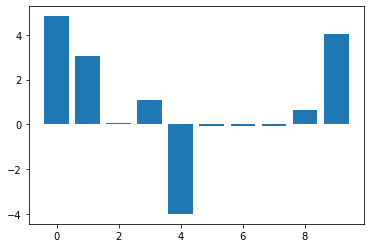

In [340]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(pl_test_mid, pl_test_points_mid)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

[ 5.98230242  3.09027481  0.09305292  0.58034948 -4.98655994 -0.35098333
 -0.19607483 -0.29573695  2.38945069  1.78481907]
Feature: 0, Score: 5.98230
Feature: 1, Score: 3.09027
Feature: 2, Score: 0.09305
Feature: 3, Score: 0.58035
Feature: 4, Score: -4.98656
Feature: 5, Score: -0.35098
Feature: 6, Score: -0.19607
Feature: 7, Score: -0.29574
Feature: 8, Score: 2.38945
Feature: 9, Score: 1.78482


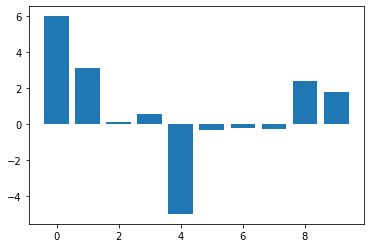

In [335]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(pl_test_array, pl_test_points)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [322]:
type(pl_test)

pandas.core.frame.DataFrame

In [303]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(pl_test, n_informative=11, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'DataFrame'